In [1]:
import torch
import torchvision
from model import Model
from utils import get_rep, cumulate_reps, plot_rep, plot_dendo

In [2]:
model = Model(num_rep=32, num_hidden=128)
model_state_dicts = torch.load("models/model.pt")

Representations and Hierarchy for Images with noise mean : 0, std : 0


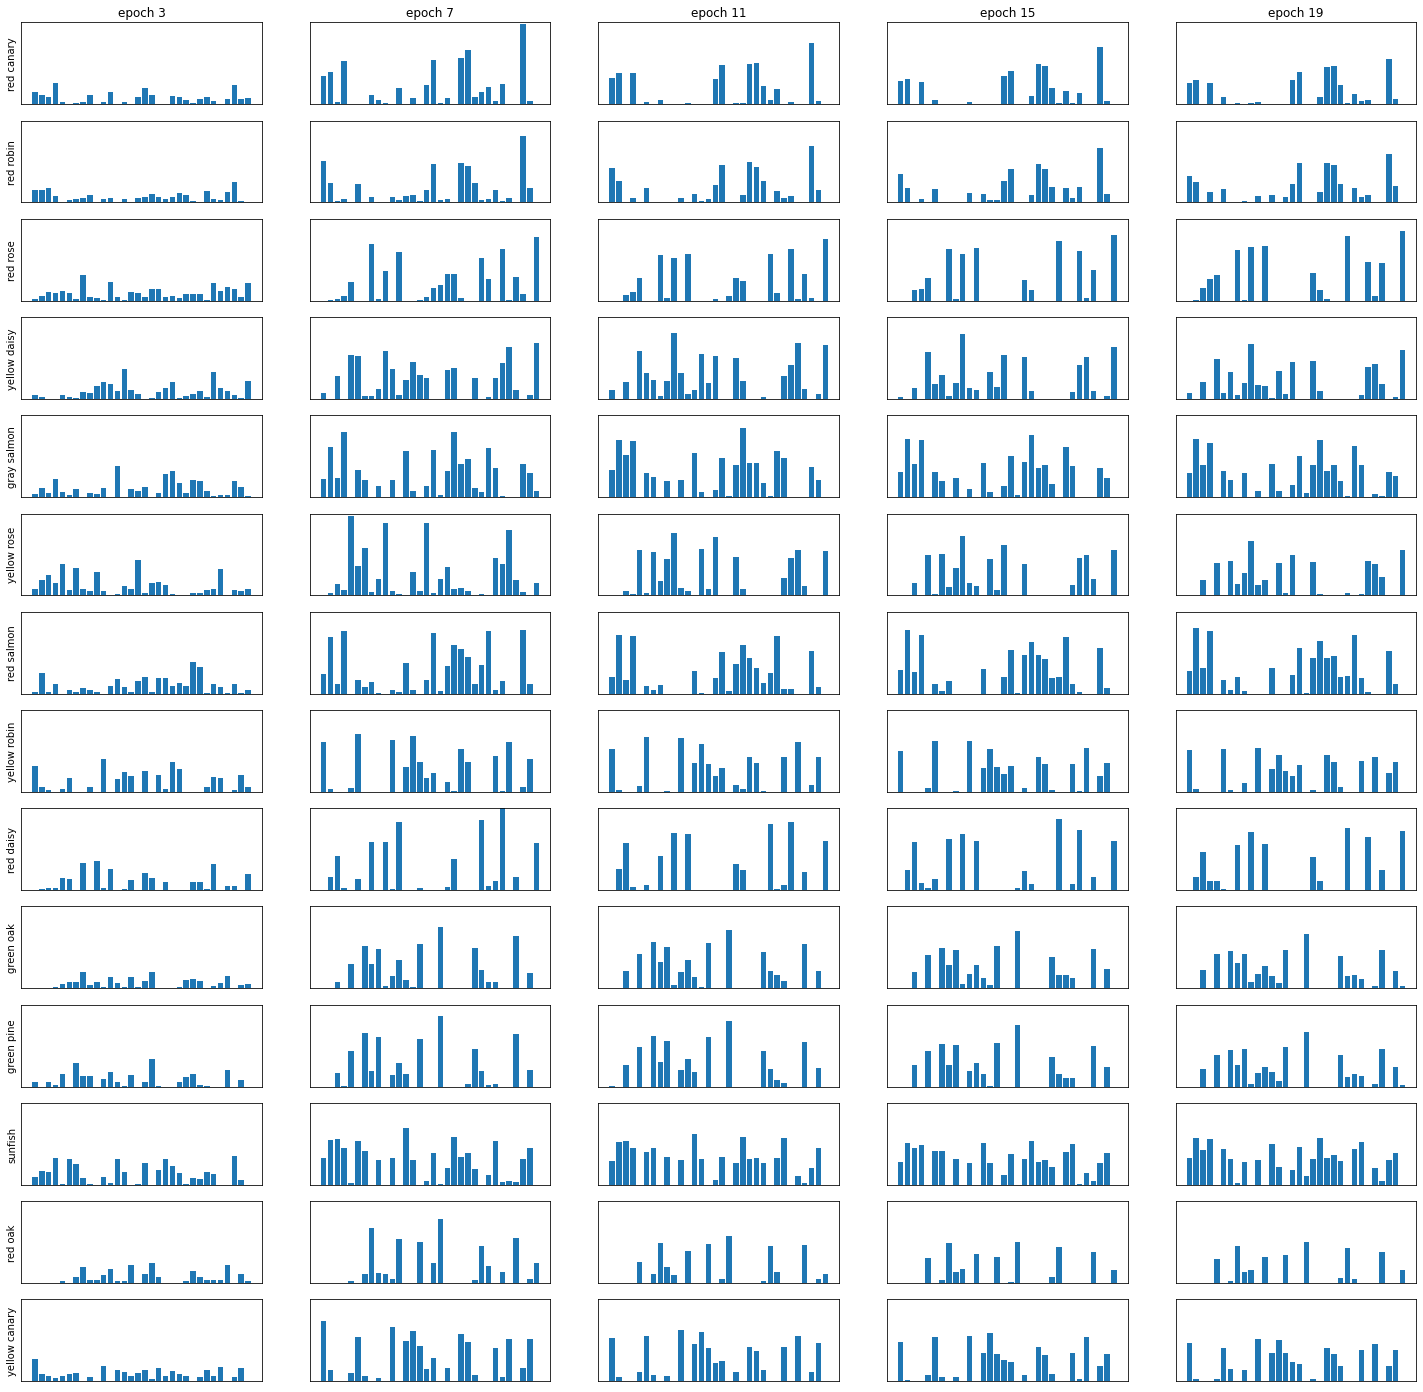

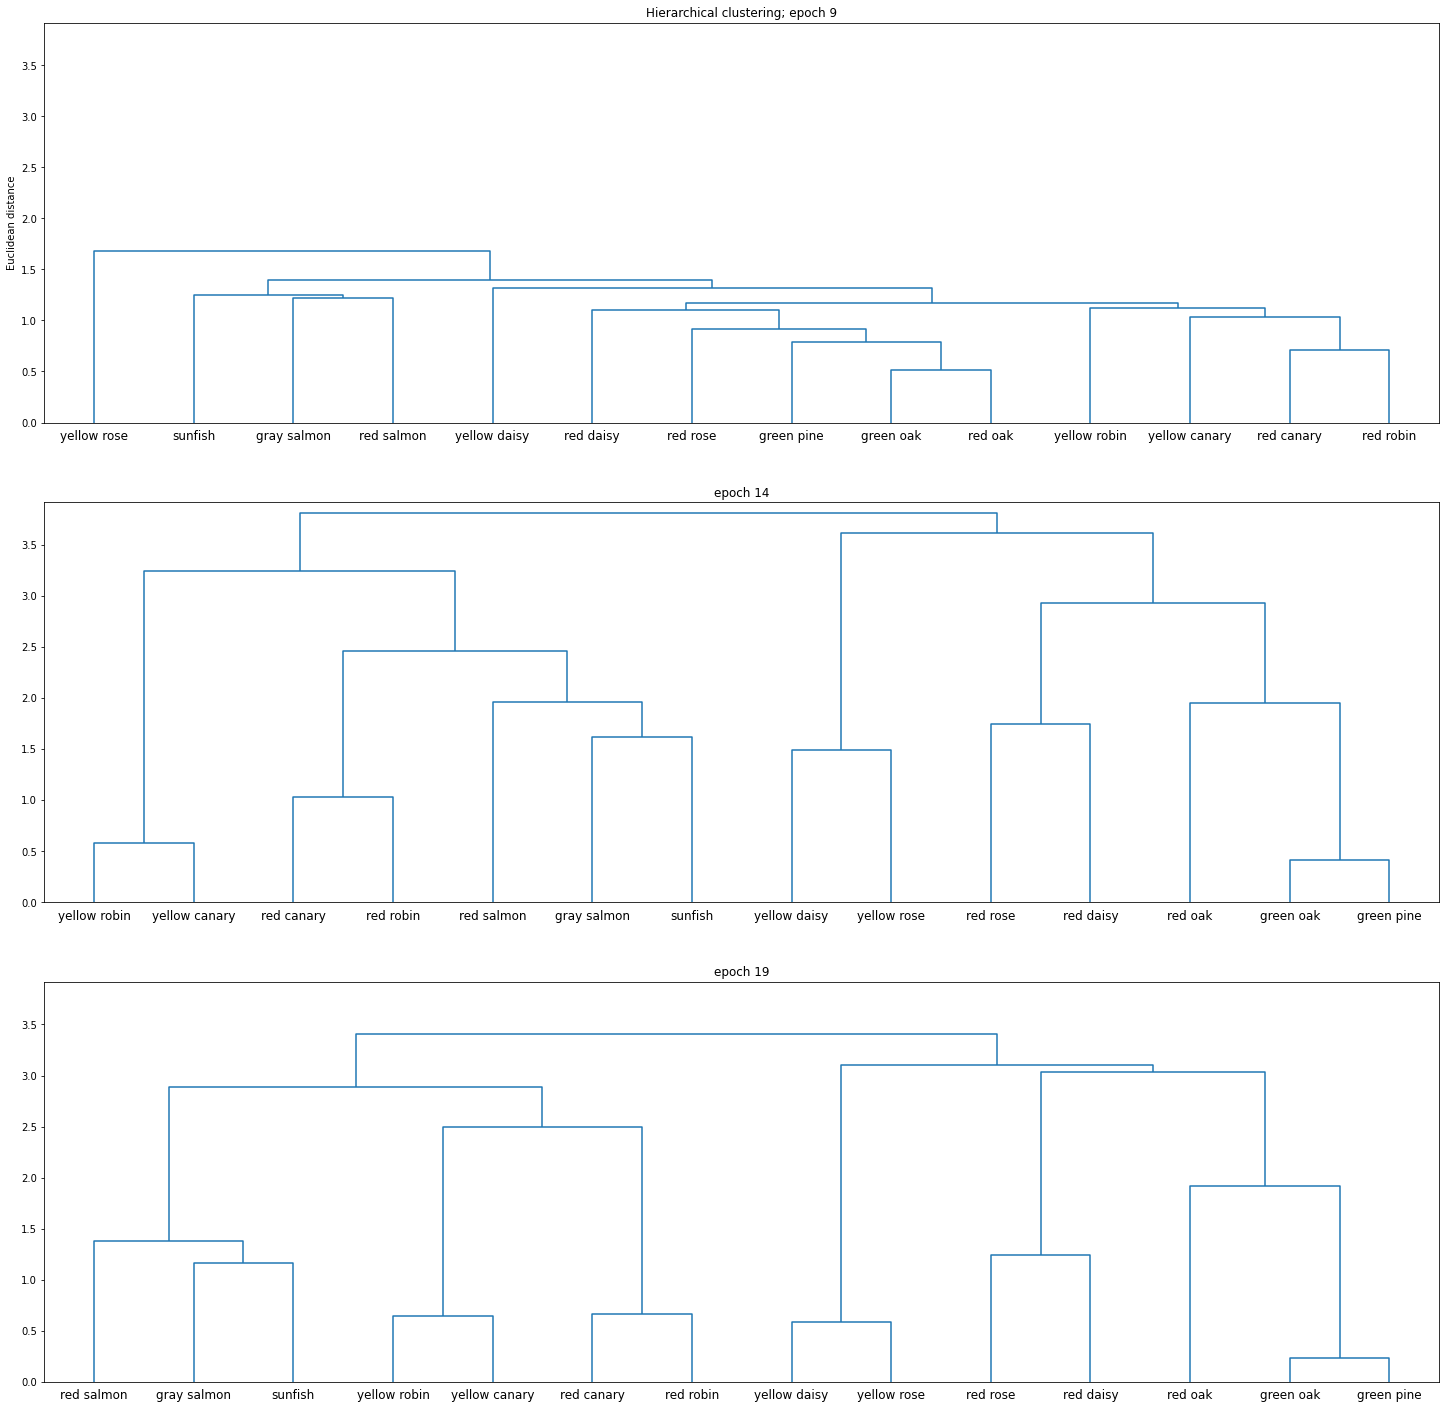

Representations and Hierarchy for Images with noise mean : None, std : 0.05


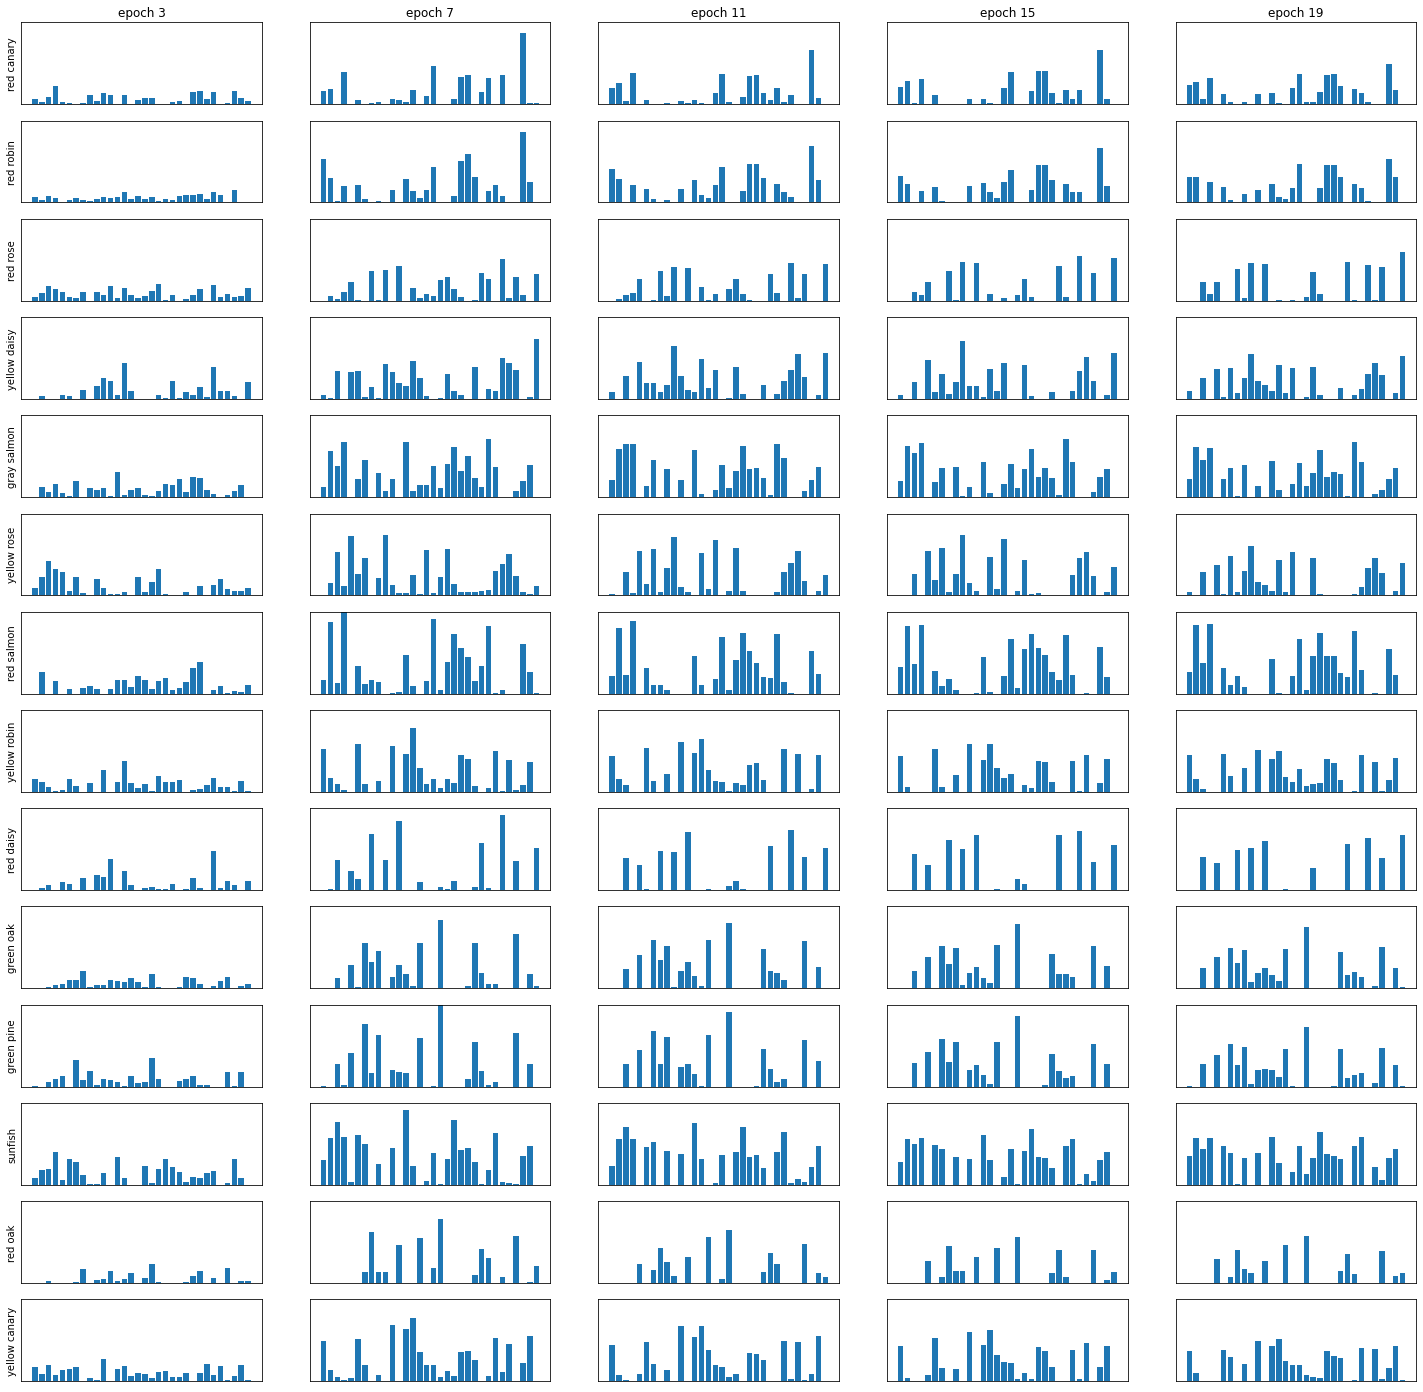

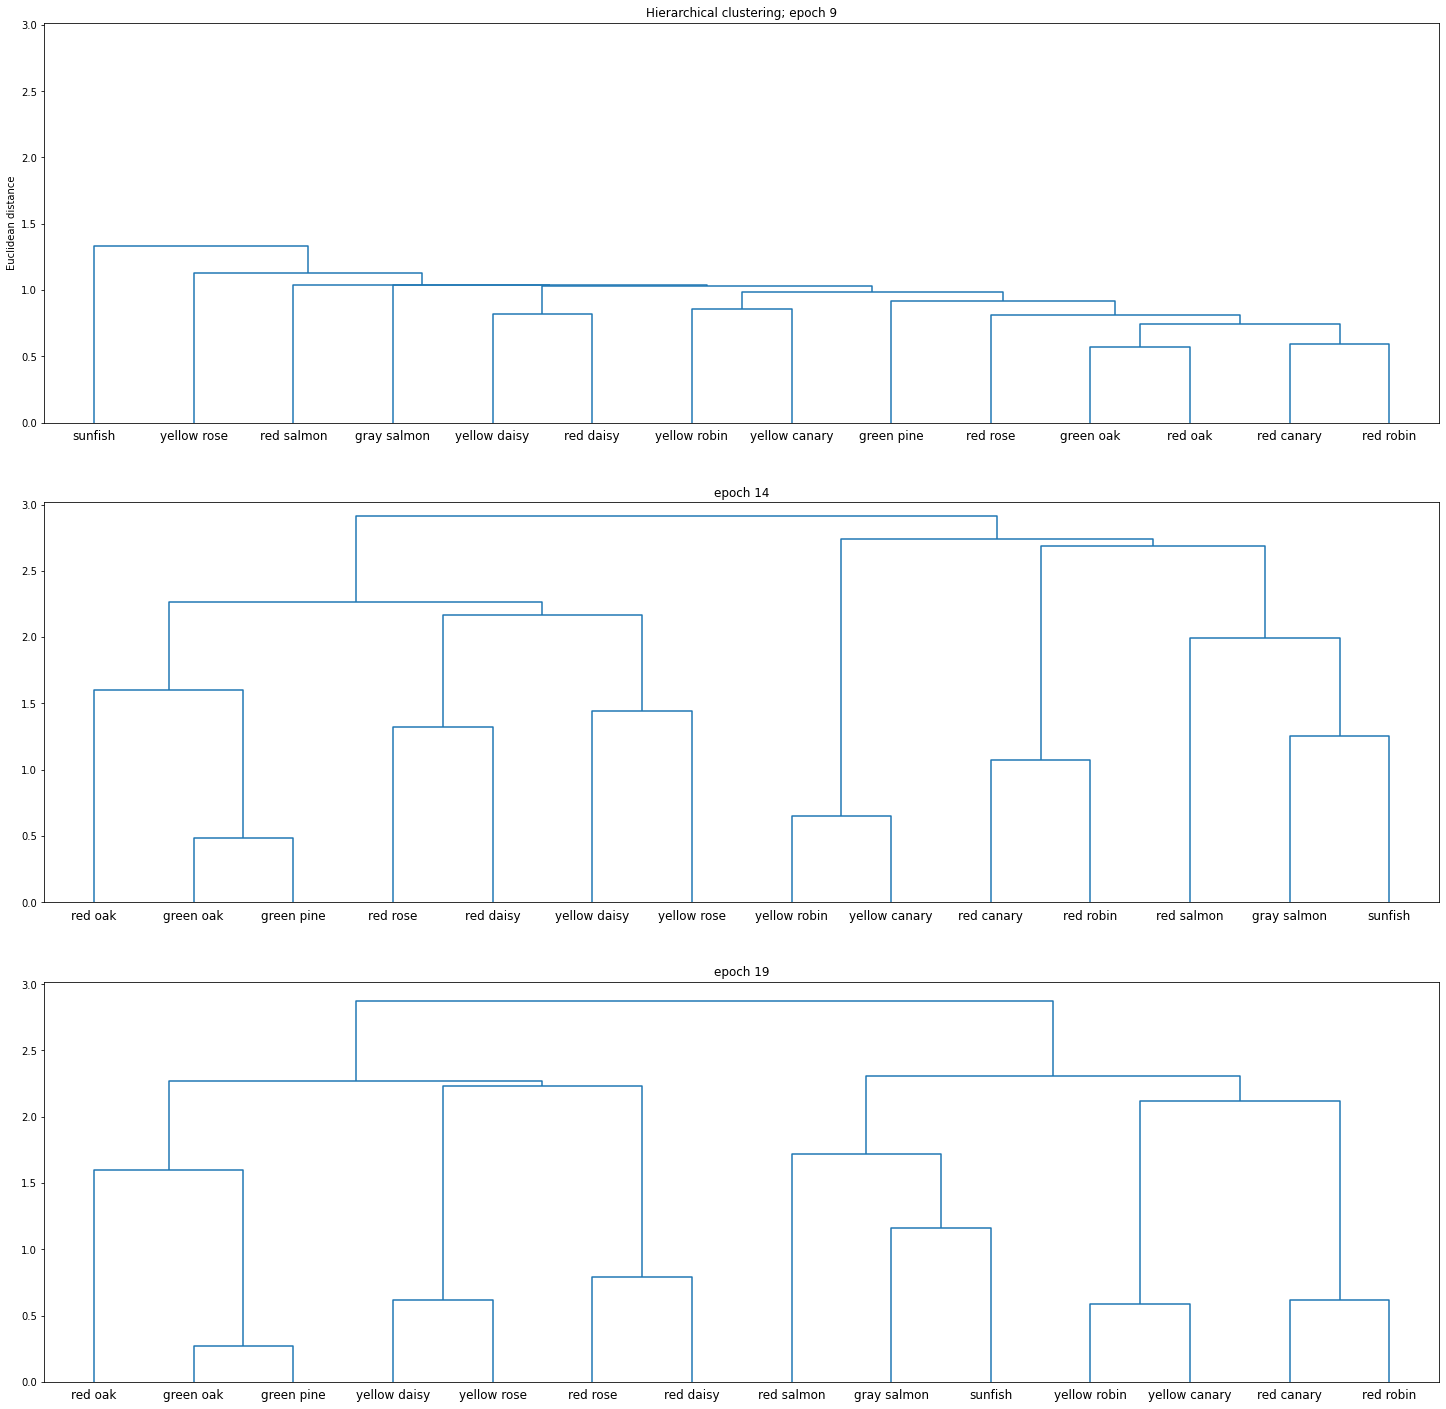

Representations and Hierarchy for Images with noise mean : None, std : 0.1


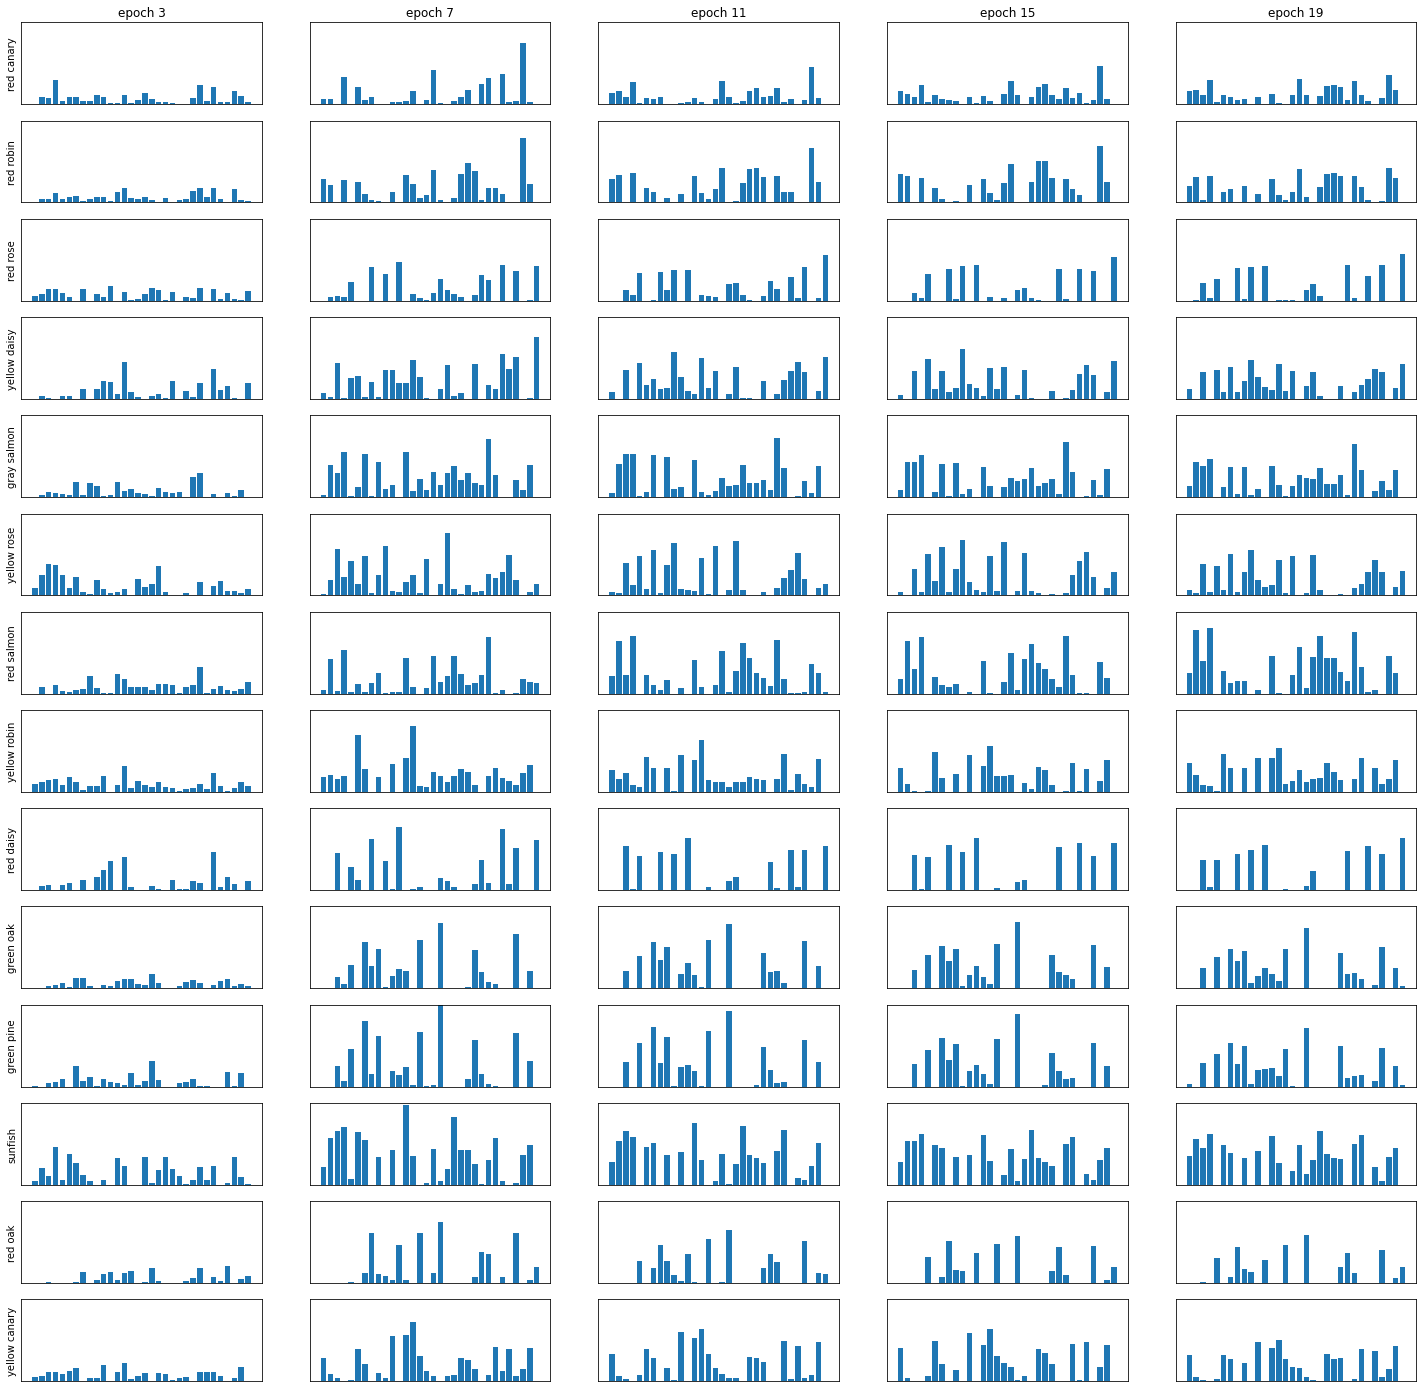

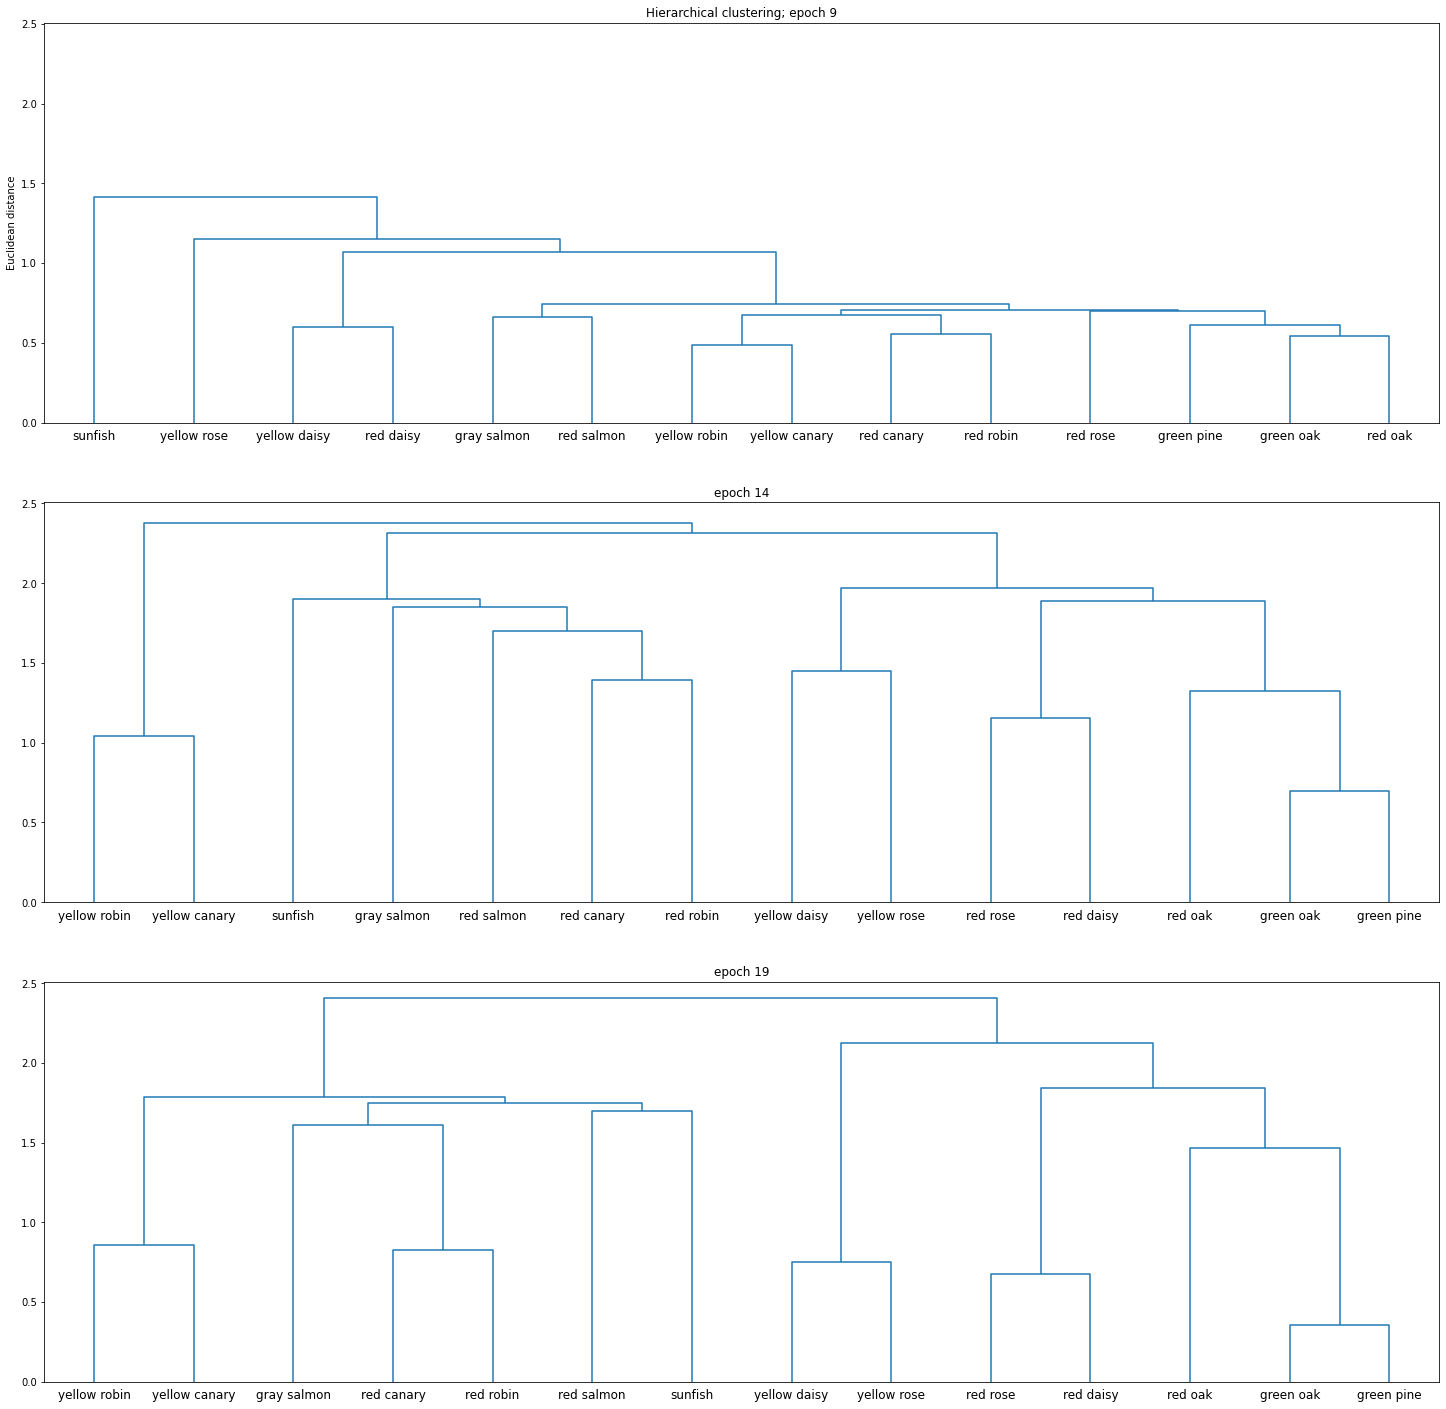

Representations and Hierarchy for Images with noise mean : None, std : 0.2


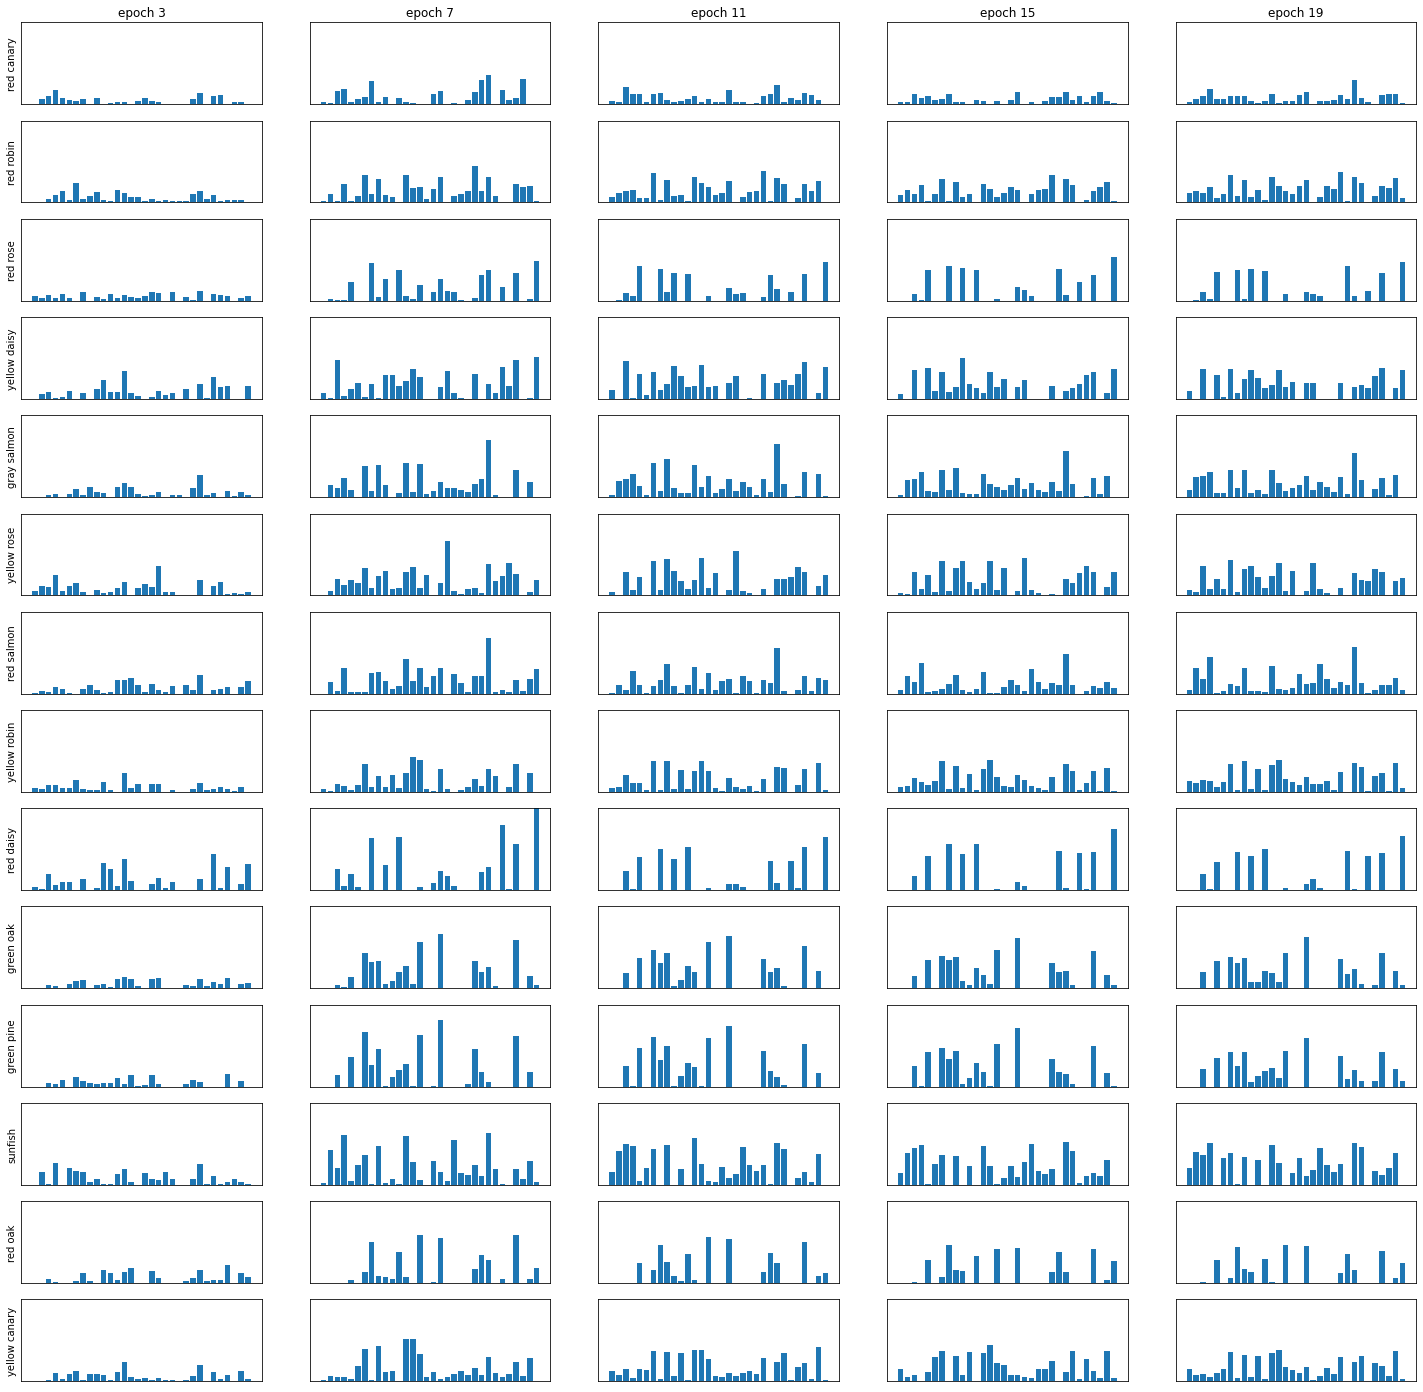

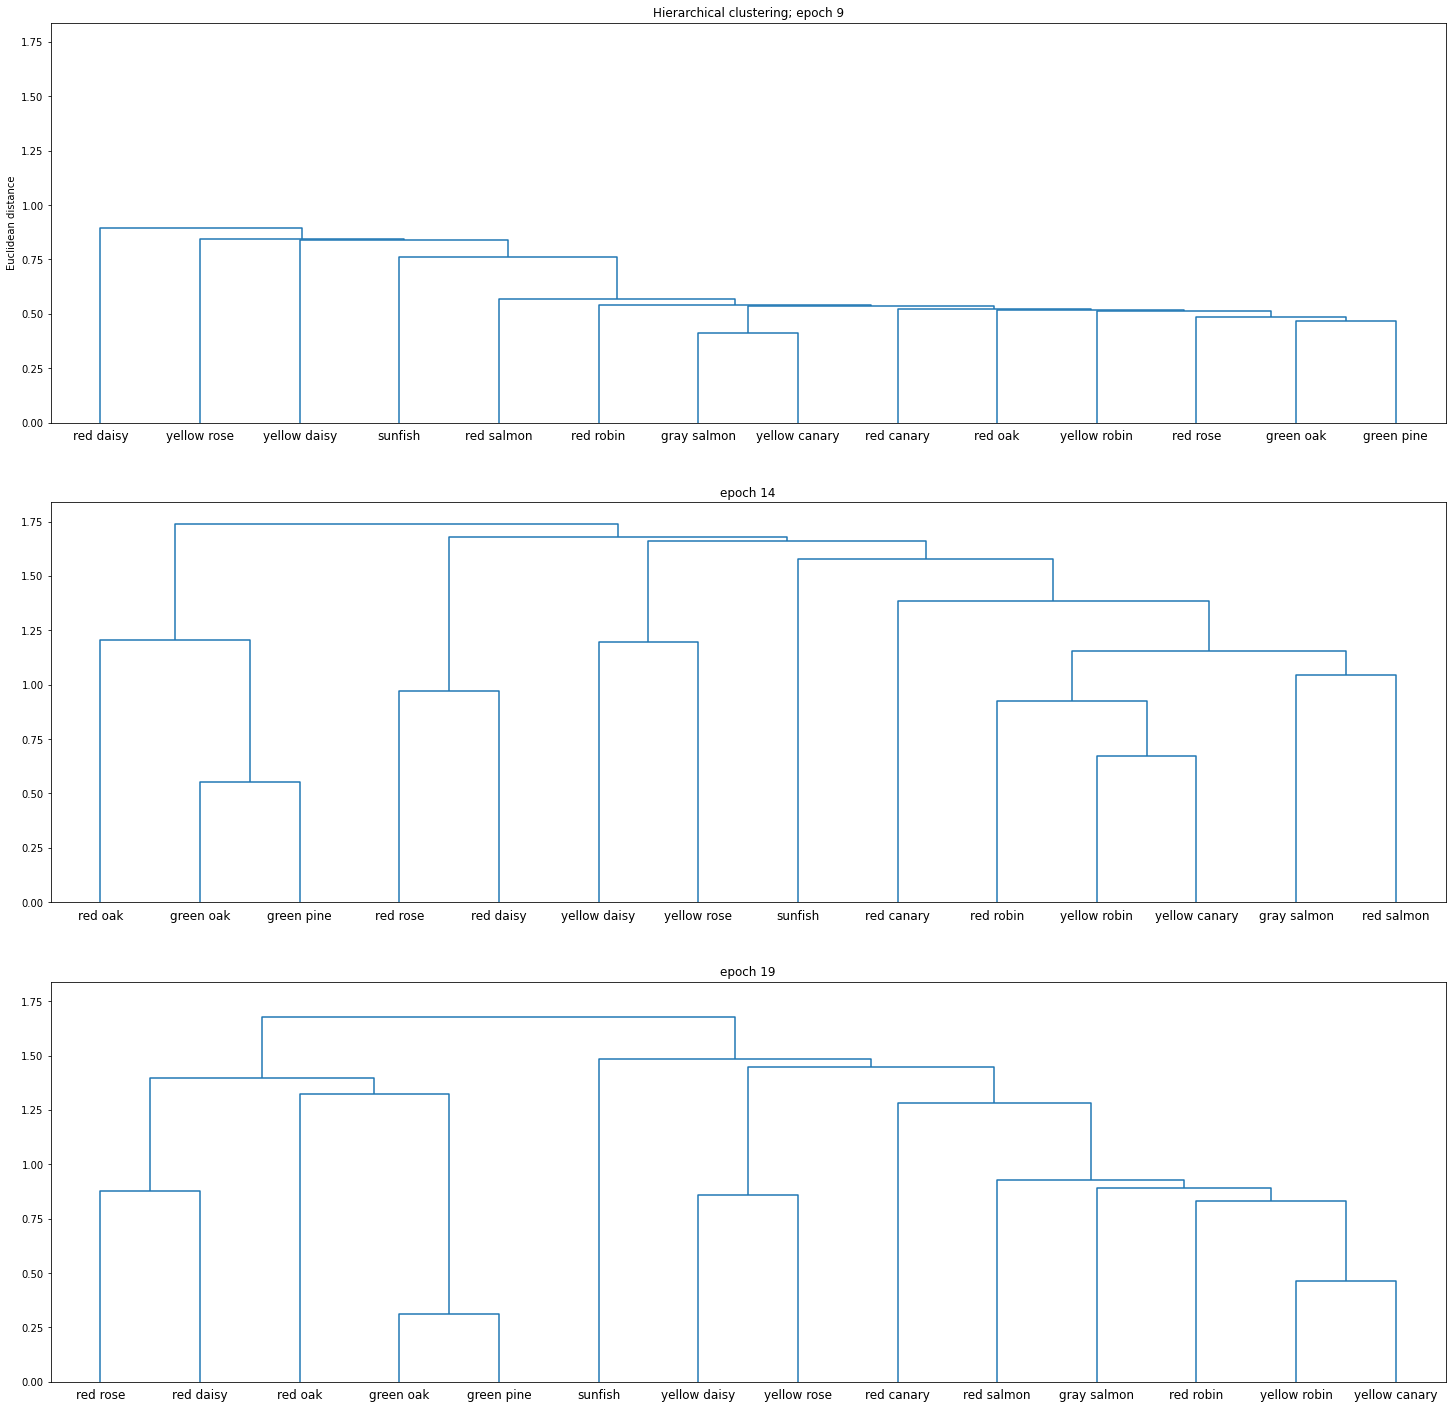

In [3]:
noise = [[0, 0], [None, 0.05], [None, 0.1], [None, 0.2]] #[mean, std] if mean == None, calculates mean automatically. 

for mean, std in noise:
    epoch_reps = []
    for weights in model_state_dicts:
        model.load_state_dict(weights)
        rep = get_rep(model, mean, std)
        epoch_reps.append(rep)
    [rep1, rep2, rep3, rep4, rep5], names = cumulate_reps(epoch_reps)
    print(F"Representations and Hierarchy for Images with noise mean : {mean}, std : {std}")
    plot_rep(rep1, rep2, rep3, rep4, rep5, names)
    plot_dendo(rep1, rep3, rep5, names)